In [1]:
# Add the relevant scripts from LArMachineLearningData
# Nice the process so it can run with lots of cores on low priority
import os
os.nice(20)

# Add local paths
import sys
hnlDIR = os.environ['_']
sys.path.append('../pyscript')

import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import gridspec

from scipy.optimize import curve_fit 

import warnings
warnings.filterwarnings("ignore")

In [2]:
savePath = "../plot_files/throw_stat_univ/"


In [3]:
rockbox_cv =[0, 1, 0, 0, 2, 2, 12, 10, 16, 18, 7, 6, 4, 0, 1, 0, 0, 0, 0]
ncpi0_cv = [0, 0, 3, 3, 30, 76, 143, 240, 321, 304, 256, 132, 70, 20, 16, 6, 5, 5, 1]

name_type = "ncpi0_"
cv =ncpi0_cv

#name_type = "rockbox_"
#cv = rockbox_cv

In [4]:
cv = np.array(cv)
print(cv)

cv_plot = np.insert(cv, 0, 0)
print(cv_plot)

bins = np.arange(0, 20, 1)
print(bins)
bins_mid = np.convolve(bins, [0.5, 0.5], "valid")
print(bins_mid)

[  0   0   3   3  30  76 143 240 321 304 256 132  70  20  16   6   5   5
   1]
[  0   0   0   3   3  30  76 143 240 321 304 256 132  70  20  16   6   5
   5   1]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19]
[ 0.5  1.5  2.5  3.5  4.5  5.5  6.5  7.5  8.5  9.5 10.5 11.5 12.5 13.5
 14.5 15.5 16.5 17.5 18.5]


In [5]:
half_width = 18.936 /2 

def gaus_fixedmean(X, A, sigma, C):
    return A * np.exp( -( X - half_width )**2 / ( 2 * sigma**2 ) ) + C

In [6]:
prediction = [max(cv), 1.308,  0]

lower_bound = [-np.inf,-np.inf, 0]

upper_bound = [np.inf, np.inf, np.inf]

param_bounds=(lower_bound, upper_bound)

parameters, covariance = curve_fit(gaus_fixedmean, bins_mid, cv, p0 = prediction, bounds=param_bounds) 
err = np.sqrt(np.diag(covariance))

amplitude = 312.419221901607 +- 18.509713603979506
sigma = 2.011556540557392 +- 0.15387546890750797
offset = 2.932372246468634 +- 9.26193993891902


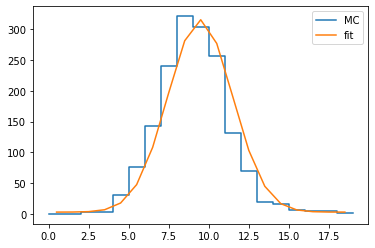

In [8]:
fit_A = parameters[0] 
fit_sigma = parameters[1]
fit_C = parameters[2]

err_A = err[0]
err_sigma = err[1]
err_C = err[2]
  
fit_y = gaus_fixedmean(bins_mid, fit_A, fit_sigma, fit_C)

print("amplitude = {} +- {}".format(fit_A, err_A))
print("sigma = {} +- {}".format(fit_sigma, err_sigma))
print("offset = {} +- {}".format(fit_C, err_C))


plt.step(bins, cv_plot, label = 'MC')
plt.plot(bins_mid, fit_y, '-', label='fit') 
#plt.errorbar(bins_mid, fit_y, yerr= err_A, xerr= None)

#plt.ylim(0, 10)
plt.legend()

#plt.savefig(savePath+name_type+"_fit.png", dpi=200)

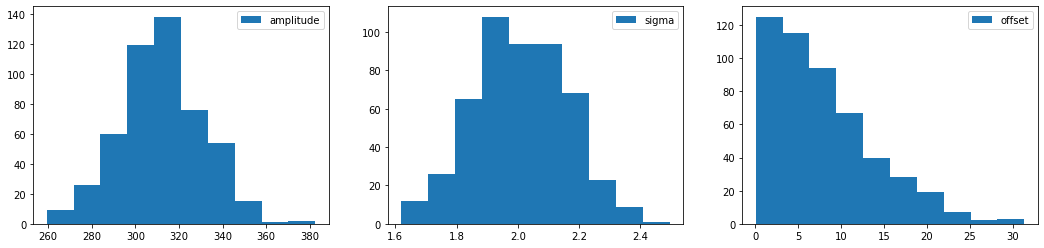

In [22]:
#make a gaussian distribution for each parameter

n_univ = 500


amplitude_arr = np.random.normal(fit_A, err_A*1, n_univ)
sigma_arr = np.random.normal(fit_sigma, err_sigma, n_univ)
C_arr = np.random.normal(fit_C, err_C, n_univ)
C_arr = abs(C_arr)


fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (18,4))

ax1.hist(amplitude_arr, label =  'amplitude')
ax1.legend()

ax2.hist(sigma_arr, label =  'sigma')
ax2.legend()

ax3.hist(C_arr, label =  'offset')
ax3.legend()

#plt.savefig(savePath+name_type+str("parameter_distribution.png"), dpi=200)

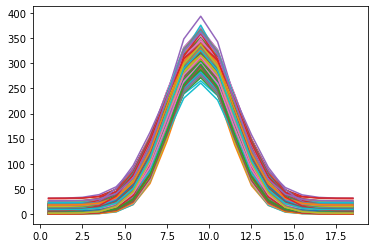

In [23]:
len_univ = np.arange(0, n_univ)

universes = []

for u in len_univ:
    fit = gaus_fixedmean(bins_mid, amplitude_arr[u], sigma_arr[u], C_arr[u])
    plt.plot(bins_mid, fit, '-', label='fit')
    #plt.ylim(0, 40)
    #plt.show()
    
    universes.append(fit)
    
#make universe into array
universes = np.array(universes)
universes = np.sort(universes, axis = 0)

#construct covariance matrix
cov = np.cov(np.subtract(cv[np.newaxis,:], universes).transpose())

#error = sqrt(diag)
cov_err = np.sqrt(np.diagonal(cov))


#plt.savefig(savePath+name_type+str("universe_distribution.png"), dpi=200)

In [24]:
cv_err= np.sqrt(cv)

In [25]:
new_cv = cv.copy()
new_cv[new_cv==0] = 1

new_cv_plot = np.insert(new_cv, 0, 0)
new_cv_err = np.sqrt(new_cv)

In [26]:
print(cv_err)
print(cov_err)
print(new_cv_err)

[ 0.          0.          1.73205081  1.73205081  5.47722558  8.71779789
 11.95826074 15.49193338 17.91647287 17.43559577 16.         11.48912529
  8.36660027  4.47213595  4.          2.44948974  2.23606798  2.23606798
  1.        ]
[ 5.97973109  5.9809031   6.02938719  6.53914604  9.0321819  14.28311566
 18.8913125  18.80075236 18.26035838 19.79825411 18.16328963 18.9189878
 18.71924197 13.90997144  8.77916423  6.46925226  6.02111604  5.98050273
  5.97977646]
[ 1.          1.          1.73205081  1.73205081  5.47722558  8.71779789
 11.95826074 15.49193338 17.91647287 17.43559577 16.         11.48912529
  8.36660027  4.47213595  4.          2.44948974  2.23606798  2.23606798
  1.        ]


Text(0, 0.5, 'Entries')

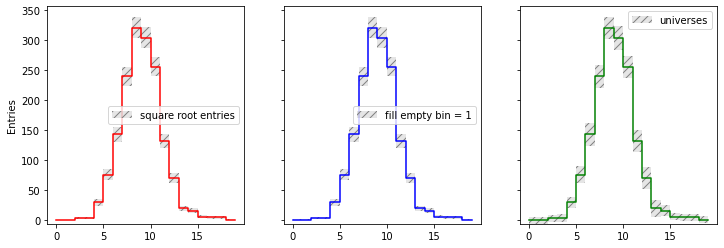

In [27]:
#-----------------------------------------------------------------#
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4), sharey = True)

ax1.step(bins, cv_plot 
         , color = 'red'
        )

ax2.step(bins, new_cv_plot 
         , color = 'blue'
        )

ax3.step(bins, cv_plot
         , color = 'green'
        )
#-----------------------------------------------------------------#
#stats
stat_err = cv_err

bottom = cv - stat_err
peak = cv + stat_err
height = peak - bottom

plt. rcParams["hatch.color"] = "gray"
ax1.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='gray'
        , alpha = 0.2 
        , label = "square root entries"
            )
#-----------------------------------------------------------------#
#stats
stat_err = new_cv_err

bottom = new_cv - stat_err
peak = new_cv + stat_err

height = peak - bottom

plt. rcParams["hatch.color"] = "gray"
ax2.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='gray'
        , alpha = 0.2 
        , label = 'fill empty bin = 1'
            )
#-----------------------------------------------------------------#
#stats
stat_err = cov_err

bottom = cv - stat_err
peak = cv + stat_err

height = peak - bottom

plt. rcParams["hatch.color"] = "gray"
ax3.bar(
        x = bins[:-1]
        , height= height
        , width = np.diff(bins)
        , bottom = bottom
        , align = 'edge'
        , hatch='///'
        , fc='gray'
        , alpha = 0.2 
        , label = "universes"
            )

#-----------------------------------------------------------------#
ax1.legend()
ax2.legend()
ax3.legend()

ax1.set_ylabel("Entries")

#ax1.set_ylim(0, 30)

#plt.savefig(savePath+name_type+str("modt_compare.png"), dpi=200)

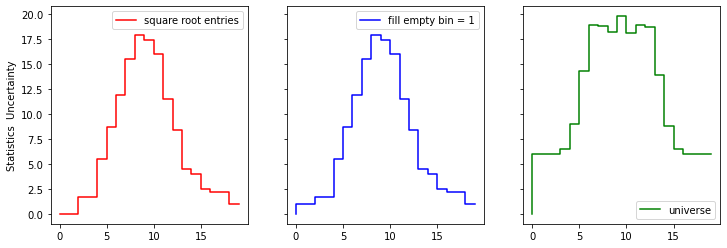

In [28]:
#-----------------------------------------------------------------#
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4),sharey = True)

ax1.step(bins, np.insert(cv_err,0,0) 
         , color = 'red'
         , label = 'square root entries'
        )


ax2.step(bins, np.insert(new_cv_err,0,0) 
         , color = 'blue'
         , label = 'fill empty bin = 1'
        )

ax3.step(bins, np.insert(cov_err,0,0) 
         , color = 'green'
         , label = 'universe'
        )

ax1.set_ylabel("Statistics  Uncertainty")

ax1.legend()
ax2.legend()
ax3.legend()

#ax1.set_ylim(0, 8)

#plt.savefig(savePath+name_type+str("error_compare.png"), dpi=200)

In [29]:
print(cov_err/new_cv)

[5.97973109 5.9809031  2.00979573 2.17971535 0.30107273 0.18793573
 0.13210708 0.07833647 0.05688585 0.06512584 0.07095035 0.14332567
 0.26741774 0.69549857 0.54869776 1.07820871 1.20422321 1.19610055
 5.97977646]


Text(0, 0.5, 'Fractional Stat Error')

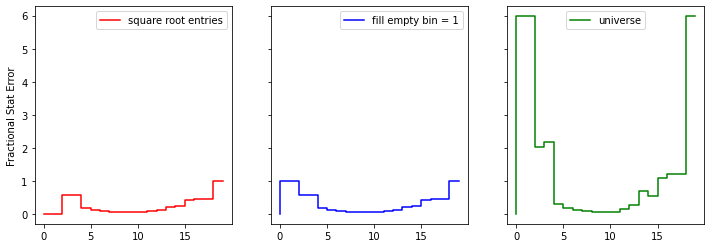

In [30]:
#-----------------------------------------------------------------#
fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize = (12,4), sharey = True)

ax1.step(bins, np.insert(cv_err/new_cv,0,0) 
         , color = 'red'
         , label = 'square root entries'
        )

ax2.step(bins, np.insert(new_cv_err/new_cv,0,0) 
         , color = 'blue'
         , label = 'fill empty bin = 1'
        )

ax3.step(bins, np.insert(cov_err/new_cv,0,0) 
         , color = 'green'
         , label = 'universe'
        )

ax1.legend()
ax2.legend()
ax3.legend()

#ax1.set_ylim(0, 1.5)
ax1.set_ylabel("Fractional Stat Error")
#plt.savefig(savePath+name_type+str("frac_error_compare.png"), dpi=200)